<a href="https://colab.research.google.com/github/MarthaNH/Data-Science/blob/main/ProyectofinalDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sephora Products and Skincare Reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[Link del dataset](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews)

El dataset se recopiló a través de Python scraper en marzo de 2023 y contiene:

Información sobre todos los productos de belleza (más de 8000) de la tienda en línea de Sephora, incluidos los nombres de productos,marcas, precios, ingredientes, calificaciones y todas las características.

Reseñas de usuarios (más de 1 millón en más de 2000 productos) de todos los productos de la categoría cuidado de la piel, incluidas las apariciones de los usuarios y calificaciones de reseñas de otros usuarios.

In [6]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

# Read the CSV file using pandas
df=pd.read_csv('/content/product_info.csv')
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

Limpieza de nans

In [9]:
df = df.fillna(0)
print(f'\nDespués de la limpieza de NaNs el DataFrame contiene :' , df.isna().sum())


Después de la limpieza de NaNs el DataFrame contiene : product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
dtype: int64


Cambiar tipo de datos a Booleanos 

In [60]:
df['limited_edition'] = df['limited_edition'].astype(bool)
df['new']= df['new'].astype(bool)
df['online_only']= df['online_only'].astype(bool)
df['out_of_stock'] = df['out_of_stock'].astype(bool)
df['sephora_exclusive'] = df['sephora_exclusive'].astype(bool)

df[['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']]

,limited_edition,new,online_only,out_of_stock,sephora_exclusive
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
8489,False,False,False,False,False
8490,False,False,False,False,False
8491,True,True,True,True,False
8492,True,True,True,False,False


¿De cuántos productos hay datos?

In [ ]:
products= df.groupby('product_name').product_name.nunique()
print("En el dataframe hay datos de", len(products), "productos" )

En el dataframe hay datos de 8415 productos


Categoría primaria

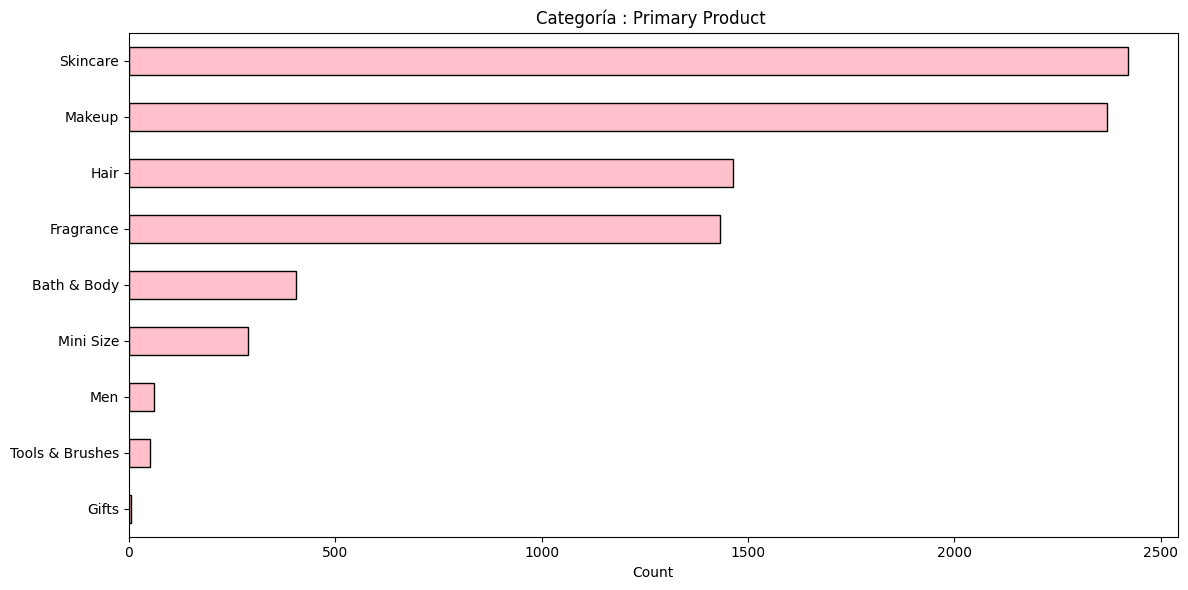

In [59]:

plt.figure(figsize=(12, 6))

df['primary_category'].value_counts().iloc[::-1].plot(kind='barh', color='pink', edgecolor='black')

plt.title('Categoría : Primary Product ')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

Matriz de correlación


In [10]:
df_hm = df.drop(columns=['limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'product_name', 'brand_name', 'ingredients', 'variation_type', 'variation_value', 'variation_desc'])

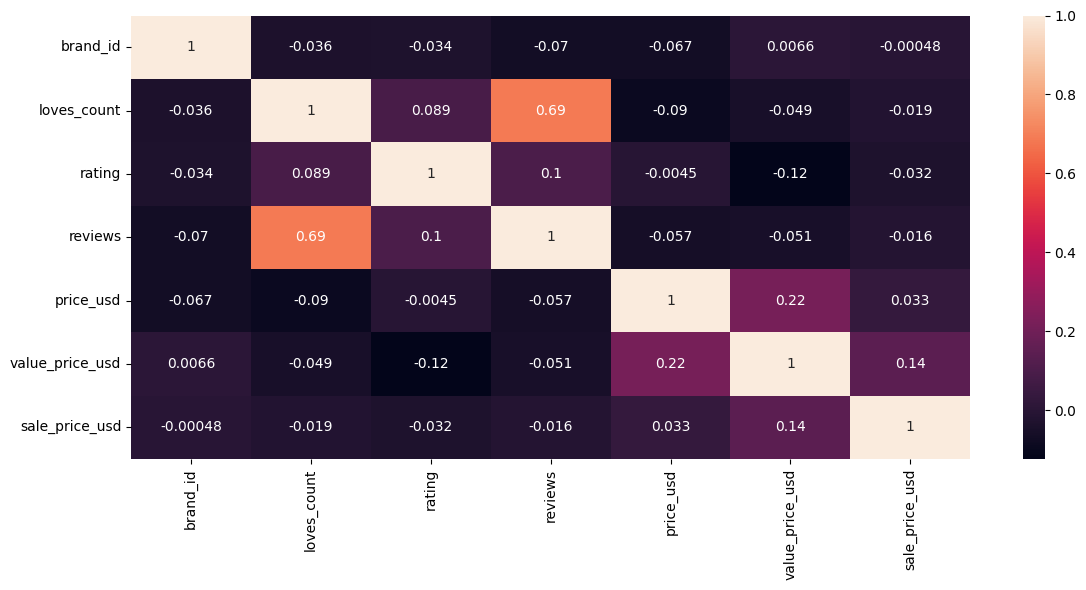

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_hm.corr(numeric_only=True), annot=True)


plt.tight_layout()
plt.show()

In [12]:
df[['product_name', 'brand_name', 'reviews', 'rating', ]].query('reviews > 5000').reset_index().sort_values('rating', ascending=False).head(10)

,index,product_name,brand_name,reviews,rating
2,251,Modern Renaissance Eye Shadow Palette,Anastasia Beverly Hills,9133.0,4.7931
3,258,Ombre Effect Long Wearing Brow Powder Duo,Anastasia Beverly Hills,5086.0,4.6950
1,248,"DIPBROW Waterproof, Smudge Proof Brow Pomade",Anastasia Beverly Hills,11158.0,4.6701
48,5250,Blush,NARS,18127.0,4.6643
52,6375,Rosebud Salve,Rosebud Perfume Co.,5199.0,4.6463
76,8430,Black Opium Eau de Parfum,Yves Saint Laurent,7838.0,4.6369
25,2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,12136.0,4.6357
15,987,Full-On Plumping Lip Polish Gloss,Buxom,12367.0,4.6250
62,7340,Amazonian Clay 12-Hour Blush,tarte,6187.0,4.6131
73,8185,Flowerbomb,Viktor&Rolf,5039.0,4.5850


Top 10 Sephora (productos con mayor rating)




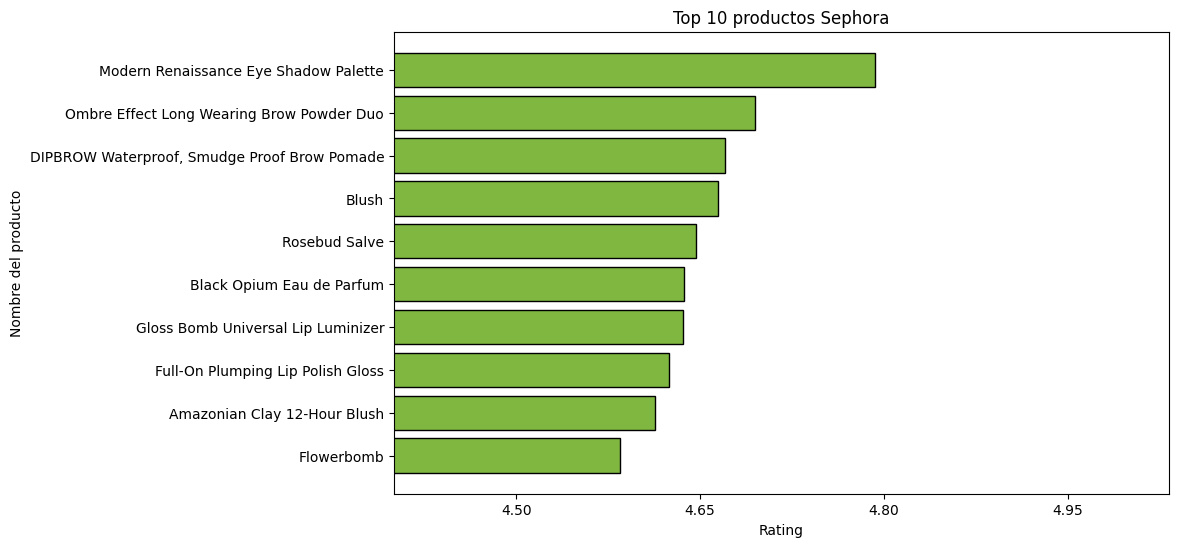

In [13]:
plt.figure(figsize=(10, 6))

brp = df[['product_name', 'brand_name', 'reviews', 'rating', ]].query('reviews > 5000').sort_values('rating', ascending=False).head(10)

plt.barh(brp['product_name'], brp['rating'], color='#80B741', edgecolor='black')

plt.title('Top 10 productos Sephora')
plt.xlabel('Rating')
plt.ylabel('Nombre del producto')



import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().invert_yaxis()
plt.xlim(4.4)

plt.show()

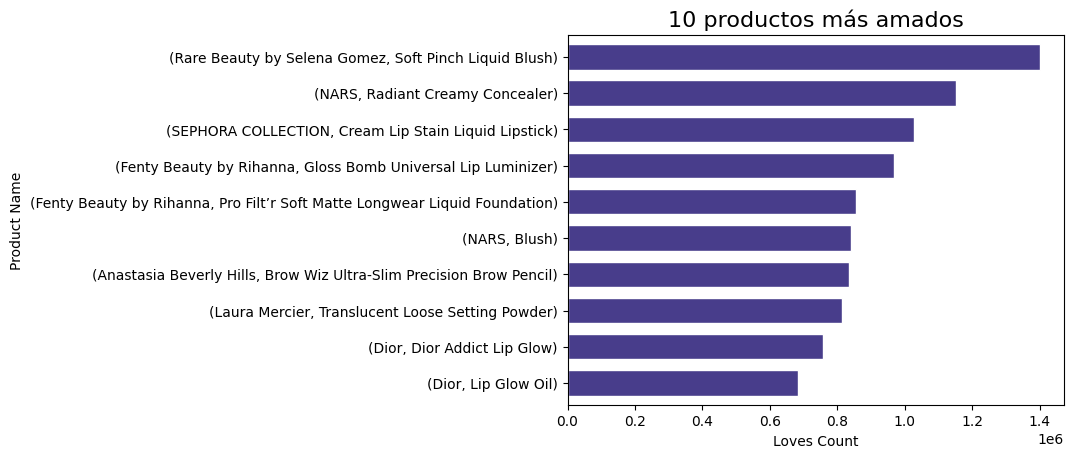

In [30]:


df_makeup_loved_product = df.query('primary_category == "Makeup"').groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(10).iloc[::-1]
df_makeup_loved_product.plot(kind='barh', color='darkslateblue', edgecolor='white', width=0.7)

plt.title('10 productos más amados', fontdict={'fontsize': 16})
plt.xlabel('Loves Count')
plt.ylabel('Product Name')


plt.show()

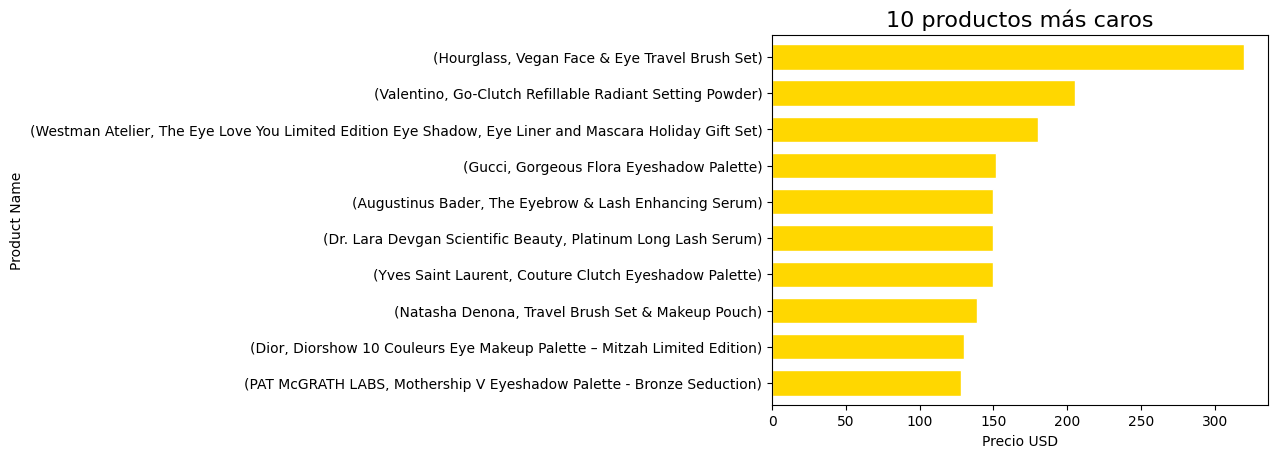

In [50]:

makeup_price = df[['product_name', 'brand_name', 'primary_category', 'price_usd']].query('primary_category == "Makeup"').nlargest(10, 'price_usd')
makeup_plot = makeup_price.drop(columns=['primary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


makeup_plot.plot(kind='barh', color= 'gold', edgecolor='white', width=0.7)
plt.title('10 productos más caros', fontdict={'fontsize': 16})
plt.xlabel('Precio USD')
plt.ylabel('Product Name')


plt.show()

Text(0.5, 0, 'Price in dollars')

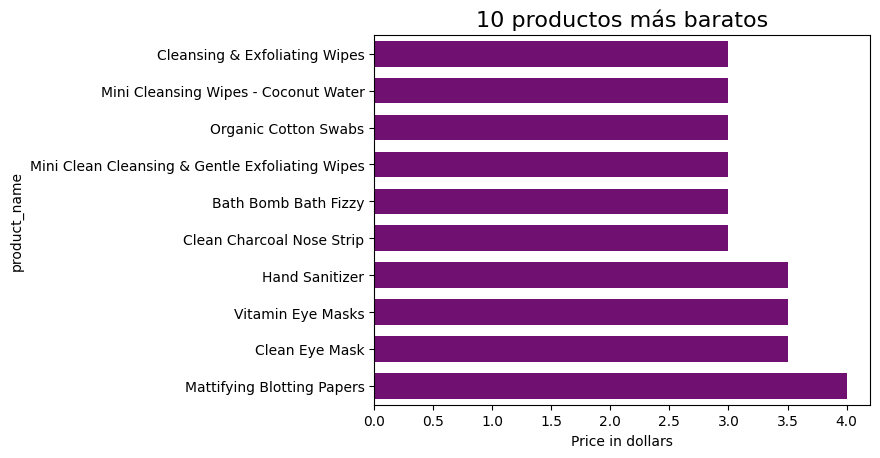

In [53]:
cheap = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=True).head(10)
sns.barplot(cheap,x='price_usd',y='product_name', color='purple' ,  width=0.7)
plt.title('10 productos más baratos', fontdict={'fontsize': 16})
plt.xlabel("Price in dollars")





Relación entre el rating y las reseñas

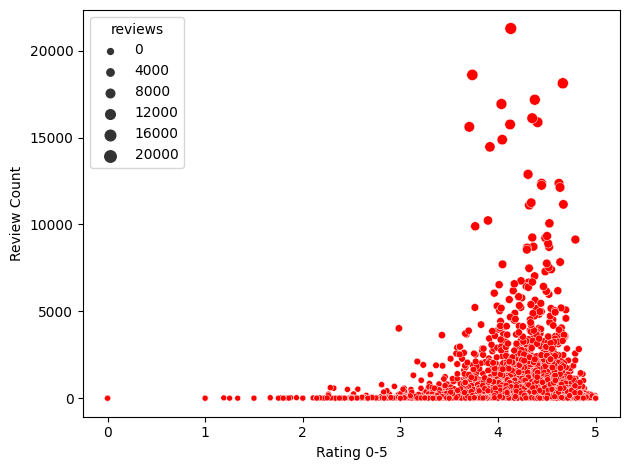

In [63]:
sns.scatterplot(x='rating', y='reviews', data=df, size='reviews', legend=True, color='red')

plt.xlabel('Rating 0-5')
plt.ylabel('Review Count')
plt.tight_layout()
plt.show()

Relación entre rating y loves count

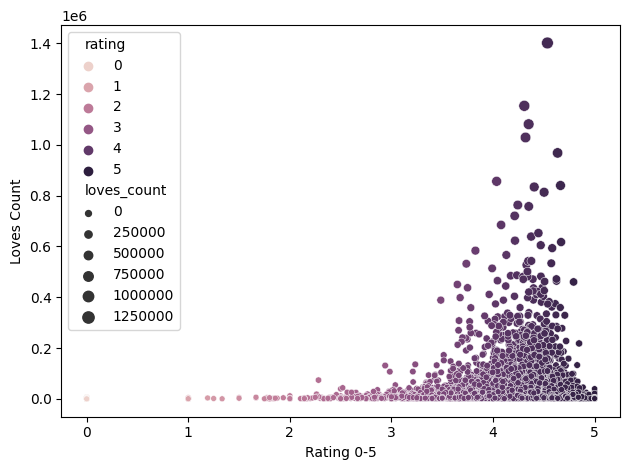

In [62]:

sns.scatterplot(x='rating', y='loves_count', data=df, size='loves_count', hue='rating', legend=True)

plt.xlabel('Rating 0-5')
plt.ylabel('Loves Count')
plt.tight_layout()
plt.show()

Procesamiento de texto

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
file_path = '/content/reviews_0_250.csv'

# Read the CSV file using pandas


# Read the CSV file using pandas
df1 = pd.read_csv(file_path)

<ipython-input-18-d413995f2a2f>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path)


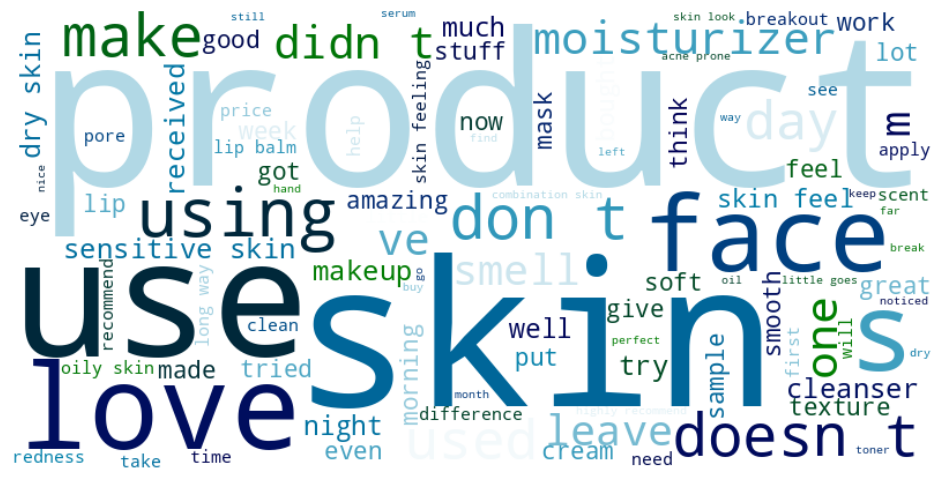

In [56]:
review_text = df1['review_text'].astype(str)

# Define stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "don t", "didn t", "don't", "doesn'", "didn't" ])  # Add any other stopwords you'd like to exclude

# Create a word cloud
word_cloud = WordCloud(stopwords=stopwords,
                       max_words=100,
                       background_color='white',
                       colormap='ocean',  # Change the color scheme
                       width=800,
                       height=400).generate(' '.join(review_text))

# Display the generated word cloud
plt.figure(figsize=(12, 6))  # Modify the figure size
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
#tokenized= df1['review_text'].astype(str).apply(nltk.word_tokenize) 
#tokenized

In [65]:
#from nltk.corpus import stopwords

#stopwords.words('english')[0:10]